In [1]:
import sys,os,glob
import pandas as pd
import numpy as np 
import scipy as sp
from scipy.stats import linregress as lin
import matplotlib.pyplot as plt
sys.path.append('../')
from ReadData import ReadFiles

In [2]:
files = glob.glob('data/*')
params = ['Heat Treatment','Gage Diameter','Extensometer Gage Length','Final Gage Diameter','Rockwell Hardness','Rockwell Scale','(s)']
q1dict = ReadFiles(files,params)


Done :)
CSV labels are:  Index(['(s)', '(mm)', '(kN)', '(mm/mm)'], dtype='object')


## Question 1

In [22]:
rh = float(q1dict["AN"]["Rockwell Hardness"])
bh = 131.7 * np.exp(0.0252 * rh)
bh

1206.6541084663663

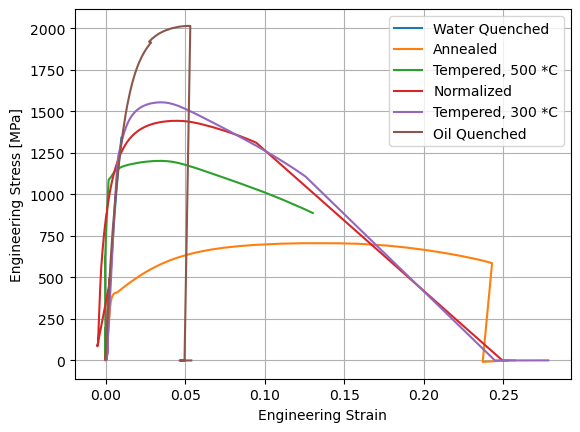

In [14]:
def stress(data,r):
    rad = r
    return 1000*data / np.pi / (rad**2)

def get_xy(Dict,key):
    dt = Dict[key]['data']
    r = np.float64(Dict[key]['Gage Diameter'])/2
    x,y = dt[:,3],stress(dt[:,2],r)
    x = x -x[0]
    ind = np.argmax(x)
    return x[:ind],y[:ind]

labels = ['Water Quenched','Annealed','Tempered, 500 *C','Normalized','Tempered, 300 *C','Oil Quenched']
for i,key in enumerate(q1dict.keys()):
    x,y = get_xy(q1dict,key)
    plt.plot(x,y,label=labels[i])
plt.legend()
plt.grid()
plt.xlabel('Engineering Strain')
plt.ylabel('Engineering Stress [MPa]')
plt.savefig('plots/q1all.png',dpi=600)


## Question 2

In [4]:
def brinnel(dic,key):
    val = np.float64(dic[key]['Rockwell Hardness'])
    typ = dic[key]['Rockwell Scale']
    return 33.22 * np.exp(0.0192*val) * (typ == 'HRB') + 131.7 * np.exp(0.0252*val) *(typ=='HRC')
def pltE(bounds,x,y,_plot=1):
    _x,_y  = x[bounds[0]:bounds[1]],y[bounds[0]:bounds[1]]
    
    m = lin(_x,_y).slope
    b = -0.002 * m
    xx = np.linspace(0.002,.01)
    yy = x*m + b
    offset = y[np.argmin(abs(y-yy))]
    if _plot:
        plt.plot(_x,_y)
        #plt.plot(xx,xx*m+b)
    return m/1e3,offset

def rd(arr,d=3):
    return np.around(arr,d)

def to_latex(arr):
    arr = np.array(arr) if type(arr) == list else arr
    arr = rd(arr) if arr.dtype=='float64' else arr
    string = [str(x)+' & ' for x in arr]
    string = ''.join(string)
    return string[:-3] + ' \\\\ \n\hline \n'

<>:26: SyntaxWarning: invalid escape sequence '\h'
<>:26: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_145891/206861425.py:26: SyntaxWarning: invalid escape sequence '\h'
  return string[:-3] + ' \\\\ \n\hline \n'


\textbf{Material} & Water Quenched & Annealed & Tempered, 500 *C & Normalized & Tempered, 300 *C & Oil Quenched \\ 
\hline 

\textbf{Youngs Modulus [GPa]} & 161.711 & 12.839 & 126.524 & 18.679 & 186.317 & 197.065 \\ 
\hline 

\textbf{Yield Strength} & 1341.104 & 636.95 & 828.038 & 1394.816 & 1269.068 & 1138.428 \\ 
\hline 

\textbf{Ultimate Strength} & 1341.104 & 705.882 & 1201.172 & 1442.464 & 1553.692 & 2013.803 \\ 
\hline 

\textbf{Toughness} & 7.386 & 155.675 & 142.251 & 131.696 & 166.139 & 86.562 \\ 
\hline 

\textbf{Percent Elongation} & 0.991 & 24.284 & 13.061 & 9.992 & 12.392 & 5.22 \\ 
\hline 

\textbf{Brinnel Hardness} & 353.671 & 1206.654 & 247.905 & 238.109 & 309.453 & 264.692 \\ 
\hline 



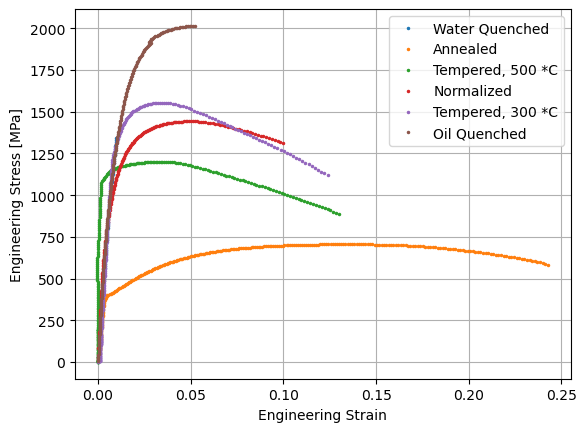

In [30]:
el_bounds= [[0,50],[80,150],[0,50],[105,140],[10,110],[0,50]]
material = []
offset = []
youngs = []
uts = []
per_elong = []
brinn  = []
tough = []

labels = ['Water Quenched','Annealed','Tempered, 500 *C','Normalized','Tempered, 300 *C','Oil Quenched']
for i,key in enumerate(q1dict.keys()):
#    print(key)
    x,y = get_xy(q1dict,key)
    if i == 3:
        b = 117
        x,y = x[b:-7],y[b:-7]
        x = x - x[0]
    if i == 4 or i == 5 or i == 1:
        b = -7
        x,y = x[:b],y[:b]
    m,off = pltE(el_bounds[i],x,y,0)
#    m,off = pltE([0,-1],x,y,0)
    material.append('4340_'+key)
    youngs.append(m)
    offset.append(off)
    uts.append(max(y))
    per_elong.append((max(x)-min(x))*100)
    brinn.append(brinnel(q1dict,key))
    tough.append(np.trapz(y,x=x))
    
    plt.plot(x,y,'.',ms = 3,label=labels[i])
plt.grid()
plt.legend()
plt.xlabel('Engineering Strain')
plt.ylabel('Engineering Stress [MPa]')
plt.savefig('plots/q1_adjusted.png',dpi=600)

youngs[2] = 126.524
label = ['Material','Youngs Modulus [GPa]','Yield Strength','Ultimate Strength','Toughness','Percent Elongation','Brinnel Hardness']
for l,array in zip(label,[labels,youngs,offset,uts,tough,per_elong,brinn]):
    print('\\textbf{'+l+'}' + ' & ' + to_latex(array))  

## Question 4

<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_145891/130077153.py:21: SyntaxWarning: invalid escape sequence '\c'
  plt.text(200,600,f'{rd(line.slope)} $\cdot$ x + {rd(line.intercept, 1)}\nR$^{2}$: {rd(line.rvalue**2,4)}',


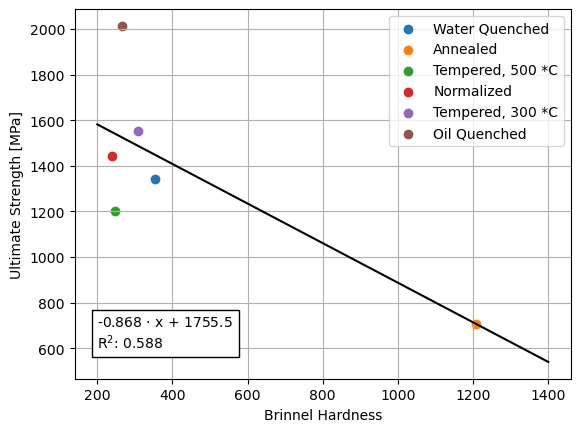

In [6]:
'''if len(brinn) == 6:
    ugly = -2
    brinn.pop(ugly)
    uts.pop(ugly)'''

def ufunc(x,a,b,c):
    return b*np.exp(c*x/1000 - a)
    
line = lin(brinn,uts)
pams = sp.optimize.curve_fit(ufunc,brinn,uts)[0]
func = lambda x : pams[1] * np.exp(x/1000 *pams[2] - pams[0])
x = np.linspace(200,1400)
for b,u,l in zip(brinn,uts,labels):
    plt.scatter(b,u,label = l)
plt.plot(x,line.slope*x + line.intercept ,color = 'k')#,label = '{} $\cdot$ x + {}'.format(rd(line.slope),rd(line.intercept)))
#plt.plot([],[],' ',label = f'R$^{2}$: {rd(line.rvalue**2,6)}')
plt.legend()
plt.grid()
plt.xlabel('Brinnel Hardness')
plt.ylabel('Ultimate Strength [MPa]')
plt.text(200,600,f'{rd(line.slope)} $\cdot$ x + {rd(line.intercept, 1)}\nR$^{2}$: {rd(line.rvalue**2,4)}',
         bbox=dict(facecolor='white', edgecolor='black', alpha=1))
plt.savefig('plots/q4.png',dpi=600)
plt.show()

## Question 6

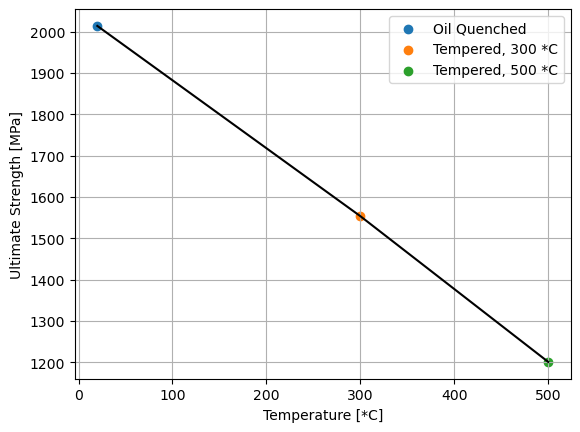

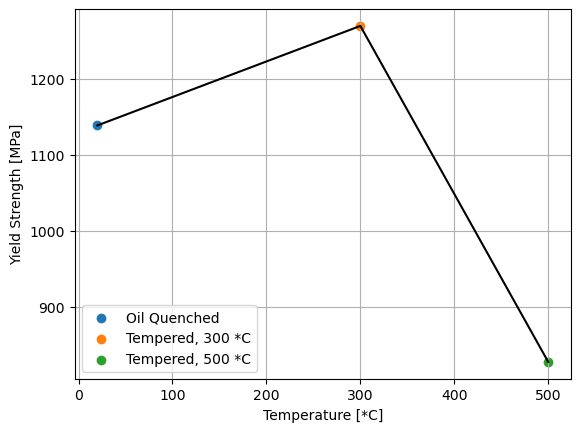

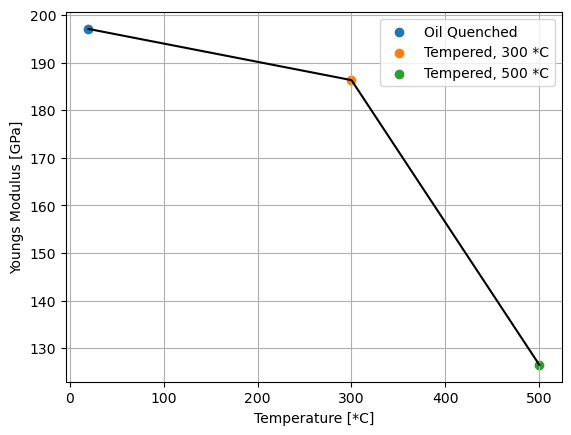

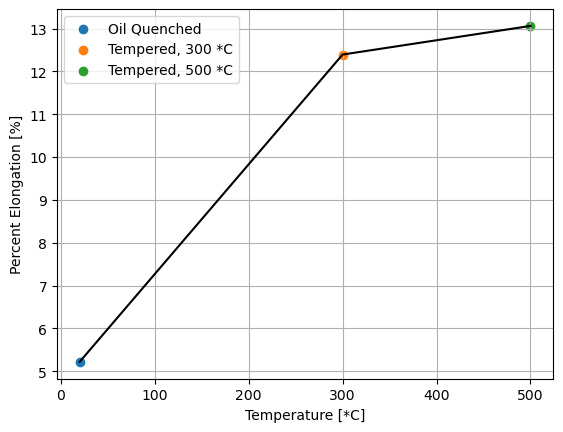

In [31]:
def plotter(y,ylab,savearg,_plot=1):
    plt.plot(temps,y,'k')
    labs = ['Oil Quenched','Tempered, 300 *C','Tempered, 500 *C']
    for _x,_y,l in zip(temps,y,labs):
        plt.scatter(_x,_y,label=l)
    plt.xlabel('Temperature [*C]')
    plt.ylabel(ylab)
    plt.grid()
    plt.legend()
    plt.savefig(f'plots/q6_{savearg}.png',dpi=600)
    if _plot:
        plt.show()
    plt.close()

_keys = [5,4,2]
temps = [20,300,500]

plotter([uts[i] for i in _keys],'Ultimate Strength [MPa]','uts')
plotter([offset[i] for i in _keys],'Yield Strength [MPa]','offset')
plotter([youngs[i] for i in _keys],'Youngs Modulus [GPa]','youngs')
plotter([per_elong[i] for i in _keys],'Percent Elongation [%]','per_elong')